## Centralized CIFAR10 Results

In [2]:
import json
import numpy as np

seeds = [0,1,2]
layers = 12
model_name = 'ViT'
small_blocks = 12
dataset = 'CIFAR10'

normal_base_paths = [f'saved_models/{dataset}/Centralized{model_name}{layers}_{i}/' for i in seeds]
adaptable_base_paths = [f'saved_models/{dataset}/CentralizedAccordion{model_name}{layers}_{i}/' for i in seeds]
#distill_base_paths = [f'saved_models/{dataset}/CentralizedDistillAccordionResNet{depth}_{i}/' for i in seeds]
#small_base_paths = [f'saved_models/{dataset}/CentralizedSmallResNet{depth}_{small_blocks}_{i}/' for i in seeds]

normal_accuracies = []
adaptable_accuracies = []
distill_accuracies = []
small_accuracies = []

with open(normal_base_paths[0] + 'results.json', 'r') as f:
    results_normal = json.load(f)
    model_fractions = results_normal['model_fractions']

for i in seeds:
    with open(normal_base_paths[i] + 'results.json', 'r') as f:
        results_normal = json.load(f)
        normal_accuracies.append(results_normal['accuracies'])

    with open(adaptable_base_paths[i] + 'results.json', 'r') as f:
        results_adaptable = json.load(f)
        adaptable_accuracies.append(results_adaptable['accuracies'])
    '''
    with open(distill_base_paths[i] + 'results.json', 'r') as f:
        results_distill = json.load(f)
        distill_accuracies.append(results_distill['accuracies'])

    with open(small_base_paths[i] + 'results.json', 'r') as f:
        results_small = json.load(f)
        small_accuracies.append(results_small['accuracies'])
    '''
adaptable_accuracies = np.array(adaptable_accuracies)
normal_accuracies = np.array(normal_accuracies)
#distill_accuracies = np.array(distill_accuracies)
#small_accuracies = np.array(small_accuracies)

adaptable_accuracy = np.mean(adaptable_accuracies, axis = 0)
normal_accuracy = np.mean(normal_accuracies, axis = 0)
#distill_accuracy = np.mean(distill_accuracies, axis = 0)
#small_accuracy = np.mean(small_accuracies, axis = 0)

adaptable_acc_std = np.std(adaptable_accuracies, axis = 0)
normal_acc_std = np.std(normal_accuracies, axis = 0)
#distill_acc_std = np.std(distill_accuracies, axis = 0)


In [3]:
adaptable_acc_std, normal_acc_std, distill_acc_std

(array([3.94773634, 1.97682124, 1.04788676, 1.53083855, 1.12377341,
        0.93191559, 0.80428022, 0.92651078, 1.08250738, 0.86784535,
        0.9613301 , 0.60477728, 0.41771867, 0.68190908, 1.10424434,
        1.15372826, 1.15557585, 1.06559321, 1.05742875, 0.42342519,
        0.41287609, 0.36914315, 0.48992063, 0.36368485, 0.32499573,
        0.31372316, 0.33589019, 0.3639597 ]),
 array([1.09414604, 2.83151706, 3.24713549, 3.40110113, 2.31227161,
        1.652883  , 2.79060726, 1.09401402, 0.86580727, 0.69123079,
        1.10243166, 1.54264564, 1.72650578, 1.98777933, 2.0908531 ,
        2.19557636, 2.38471522, 2.97235036, 3.10838651, 2.15053998,
        0.94913996, 0.85050312, 3.14969134, 3.07326464, 2.98781228,
        3.25404705, 3.19788472, 0.56750918]),
 array([1.92811364, 3.1332234 , 0.46991725, 1.27447593, 0.98445699,
        1.11583551, 1.19315641, 0.6532653 , 0.62914404, 0.75687956,
        0.45257289, 0.23921167, 0.80800165, 0.39364395, 0.54162308,
        0.38732702, 0.32

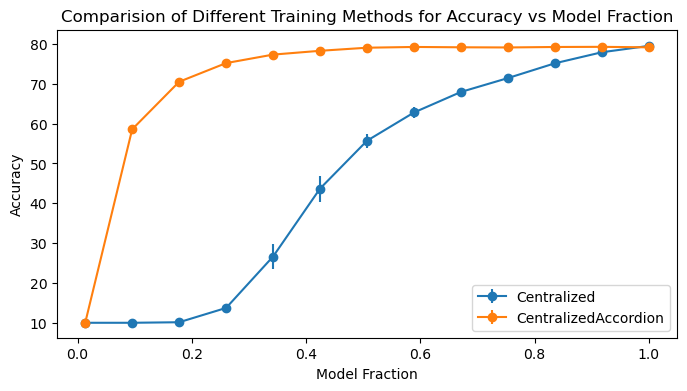

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.errorbar(model_fractions, normal_accuracy, normal_acc_std, linestyle = '-', marker = 'o', label = 'Centralized')
plt.errorbar(model_fractions, adaptable_accuracy, adaptable_acc_std, linestyle =  '-',  marker = 'o', label = 'CentralizedAccordion')
#plt.errorbar(model_fractions, distill_accuracy, distill_acc_std, linestyle = '-',  marker = 'o', label = 'CentralizedDistillAccordion')
#plt.plot(model_fractions, distill_acc_centralized, linestyle = '-',  marker = 'o', label = 'distill_centralized')
#plt.plot(model_fractions, adaptable_acc_centralized, linestyle = '-',  marker = 'o', label = 'adaptable_centralized')
plt.ylabel('Accuracy')
plt.xlabel('Model Fraction')
plt.title("Comparision of Different Training Methods for Accuracy vs Model Fraction")

plt.legend()

In [5]:
adaptable_accuracy, distill_accuracy

(array([28.16333333, 45.56666667, 55.46      , 59.07      , 62.2       ,
        63.79      , 64.35      , 64.55666667, 64.48666667, 64.57666667,
        66.41333333, 72.24666667, 77.78333333, 79.68      , 80.05666667,
        80.16333333, 80.09333333, 80.10333333, 80.14333333, 80.95666667,
        84.84      , 87.57      , 88.91666667, 89.21      , 89.21333333,
        89.25333333, 89.29666667, 89.3       ]),
 array([25.74666667, 35.44333333, 50.71333333, 59.63666667, 63.42333333,
        65.64666667, 66.53666667, 66.82666667, 66.72333333, 66.5       ,
        68.56666667, 71.70666667, 76.83      , 80.39666667, 82.38666667,
        83.14333333, 83.5       , 83.57      , 83.34333333, 83.97      ,
        85.97333333, 88.12      , 89.30666667, 89.68666667, 89.83      ,
        89.99333333, 90.07      , 90.13      ]))

In [6]:
import exp_utils

normal_val_accuracies = np.array(exp_utils.get_val_accuracies(normal_base_paths, seeds))
adaptable_val_accuracies = np.array(exp_utils.get_val_accuracies(adaptable_base_paths, seeds))
distill_val_accuracies = np.array(exp_utils.get_val_accuracies(distill_base_paths, seeds))
small_val_accuracies = np.array(exp_utils.get_val_accuracies(small_base_paths, seeds))

adaptable_val_accuracy = np.mean(adaptable_val_accuracies, axis = 0)
normal_val_accuracy = np.mean(normal_val_accuracies, axis = 0)
distill_val_accuracy = np.mean(distill_val_accuracies, axis = 0)
small_val_accuracy =  np.mean(small_val_accuracies, axis = 0)


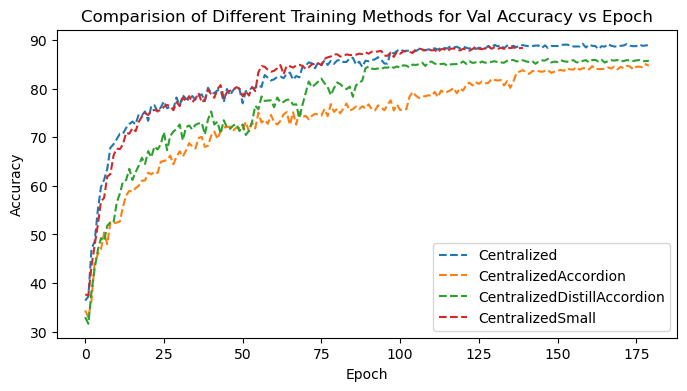

In [7]:
tab = np.arange(len(adaptable_val_accuracy))

plt.figure(figsize=(8,4))
plt.plot(tab, normal_val_accuracy, linestyle = '--', label = 'Centralized')
plt.plot(tab, adaptable_val_accuracy, linestyle =  '--',  label = 'CentralizedAccordion')
plt.plot(tab, distill_val_accuracy, linestyle = '--',  label = 'CentralizedDistillAccordion')
plt.plot(np.arange(len(small_val_accuracy)), small_val_accuracy, linestyle = '--',  label = 'CentralizedSmall')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title("Comparision of Different Training Methods for Val Accuracy vs Epoch")

plt.legend()